In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [17]:
fs = 2500
time_axis = np.linspace(0, 1, fs)
sinyal_1 = 2 * np.sin(2 * np.pi * 10 * time_axis)
sinyal_2 = 2 * np.sin(2 * np.pi * 50 * time_axis)

# Create a signal with frequency = 15 Hz and amplitude 4, with random noise
frequency_3 = 15
amplitude_3 = 100
sinyal_3 = amplitude_3 * np.sin(2 * np.pi * frequency_3 * time_axis)

sinyal_4 = 35 * np.sin(2 * np.pi * 43 * time_axis)

# Add some random noise to the signal
noise = np.random.normal(1, 200, len(time_axis))
sinyal_3 = sinyal_3 + noise

sinyal_gabung = sinyal_1 + sinyal_2 + sinyal_3 + sinyal_4

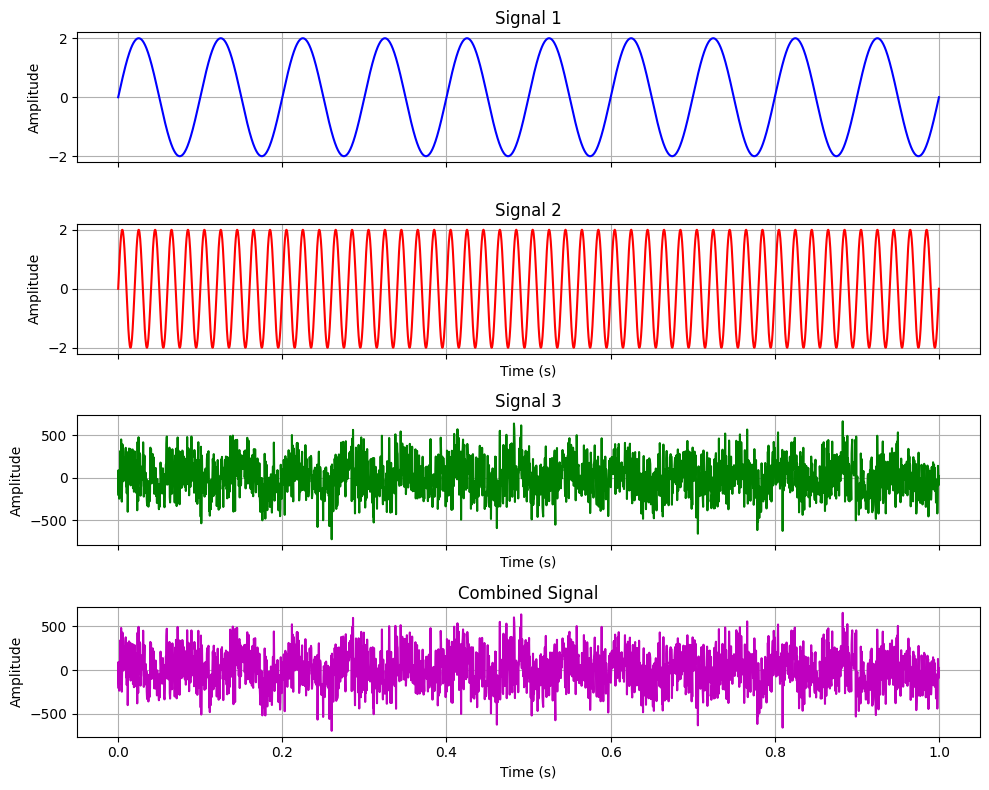

In [18]:
fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Plot Signal 1
axs[0].plot(time_axis, sinyal_1, 'b-')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Signal 1')
axs[0].grid(True)

# Plot Signal 2
axs[1].plot(time_axis, sinyal_2, 'r-')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Signal 2')
axs[1].grid(True)

# Plot Signal 3
axs[2].plot(time_axis, sinyal_3, 'g-')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
axs[2].set_title('Signal 3')
axs[2].grid(True)

# Plot Combined Signal
axs[3].plot(time_axis, sinyal_gabung, 'm-')
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Amplitude')
axs[3].set_title('Combined Signal')
axs[3].grid(True)

plt.tight_layout()
plt.show()

# Proses DFT

sinyal_gabung

In [4]:
X_k = np.arange(len(sinyal_gabung)//2) * fs / len(sinyal_gabung)
print(f"Frequencies: {X_k}")

Frequencies: [0.000e+00 1.000e+00 2.000e+00 ... 1.247e+03 1.248e+03 1.249e+03]


In [5]:
hasil_dft = np.zeros(len(sinyal_gabung))
print(f"Length of DFT: {len(hasil_dft)}")

N = len(sinyal_gabung)

Length of DFT: 2500


In [6]:
waktu_mulai = dt.datetime.now()
var_x = 0
for k in range(N):
    for n in range(N):
        var_x += 1
        hasil_dft[k] += sinyal_gabung[n] * np.exp(-2j * np.pi * k * n / N)
        
waktu_akhir = dt.datetime.now()
print(f"Berapa kali var_x di increment: {var_x}")
print(f"Time taken for DFT: {waktu_akhir - waktu_mulai}")

/var/folders/h3/797kn0gx025b0p9fs3f_c2yw0000gn/T/ipykernel_15562/1676724371.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  hasil_dft[k] += sinyal_gabung[n] * np.exp(-2j * np.pi * k * n / N)


Berapa kali var_x di increment: 6250000
Time taken for DFT: 0:00:06.465213


In [7]:
magnitude = np.abs(hasil_dft[:N//2]/N)

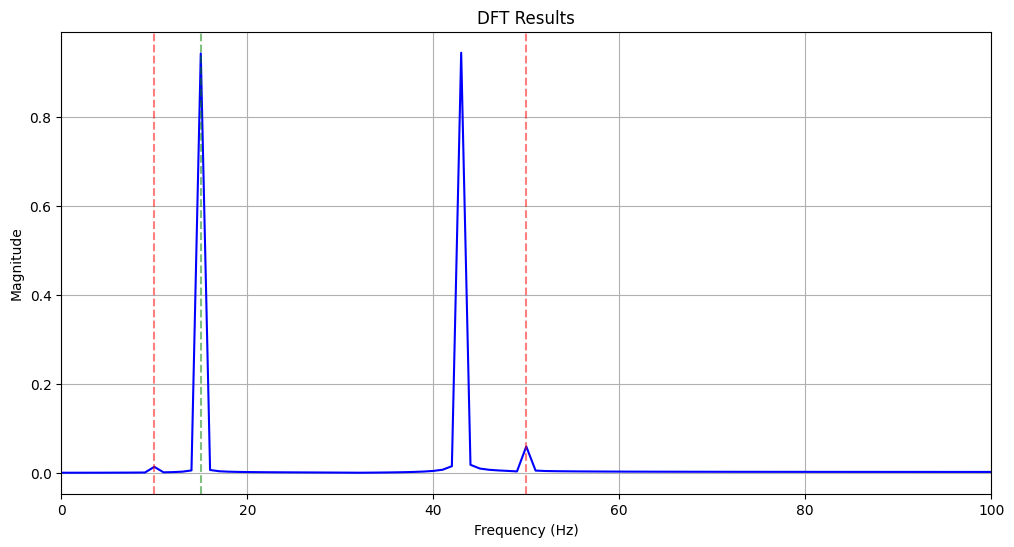

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(X_k, magnitude, 'b-')
plt.grid(True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT Results')
plt.xlim([0, 100])  # Limiting x-axis to focus on frequencies up to 100 Hz
plt.axvline(x=10, color='r', linestyle='--', alpha=0.5)  # Marking 10 Hz
plt.axvline(x=15, color='g', linestyle='--', alpha=0.5)  # Marking 15 Hz
plt.axvline(x=50, color='r', linestyle='--', alpha=0.5)  # Marking 50 Hz
plt.show()

# FFT

Time taken for FFT: 0:00:00.000385
Time taken for DFT: 0:00:06.465213
FFT is approximately 16792.76x faster than DFT


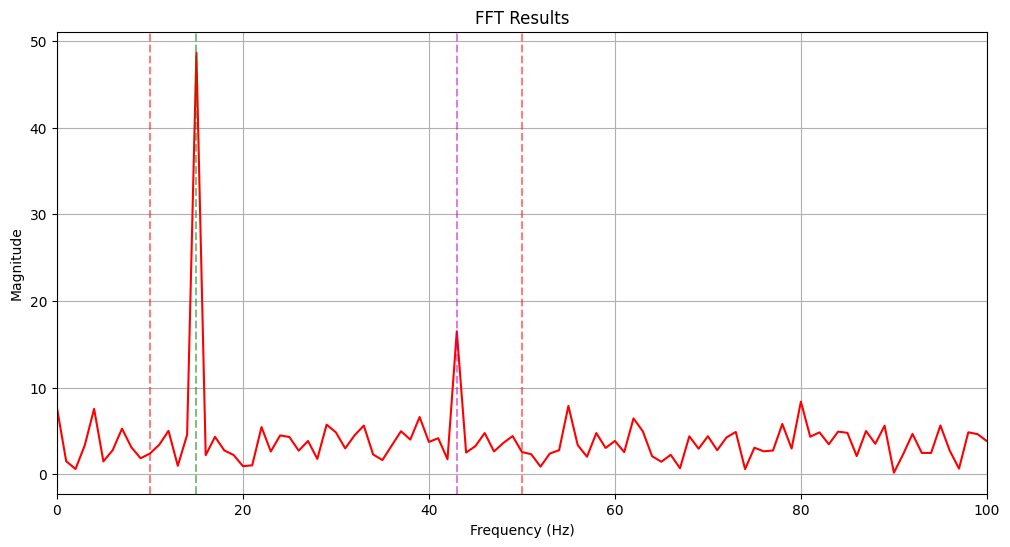

In [19]:
# Get the FFT of the combined signal
waktu_mulai_fft = dt.datetime.now()
fft_result = np.fft.fft(sinyal_gabung)
waktu_akhir_fft = dt.datetime.now()

# Calculate the magnitude of the FFT (normalize by dividing by N)
fft_magnitude = np.abs(fft_result[:N//2]/N)

# Plot the FFT results
plt.figure(figsize=(12, 6))
plt.plot(X_k, fft_magnitude, 'r-')
plt.grid(True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Results')
plt.xlim([0, 100])  # Limiting x-axis to focus on frequencies up to 100 Hz
plt.axvline(x=10, color='r', linestyle='--', alpha=0.5)  # Marking 10 Hz
plt.axvline(x=15, color='g', linestyle='--', alpha=0.5)  # Marking 15 Hz
plt.axvline(x=50, color='r', linestyle='--', alpha=0.5)  # Marking 50 Hz
plt.axvline(x=43, color='m', linestyle='--', alpha=0.5)  # Marking 43 Hz

# Print execution time
print(f"Time taken for FFT: {waktu_akhir_fft - waktu_mulai_fft}")

# Compare with DFT time
print(f"Time taken for DFT: {waktu_akhir - waktu_mulai}")
print(f"FFT is approximately {(waktu_akhir - waktu_mulai) / (waktu_akhir_fft - waktu_mulai_fft):.2f}x faster than DFT")

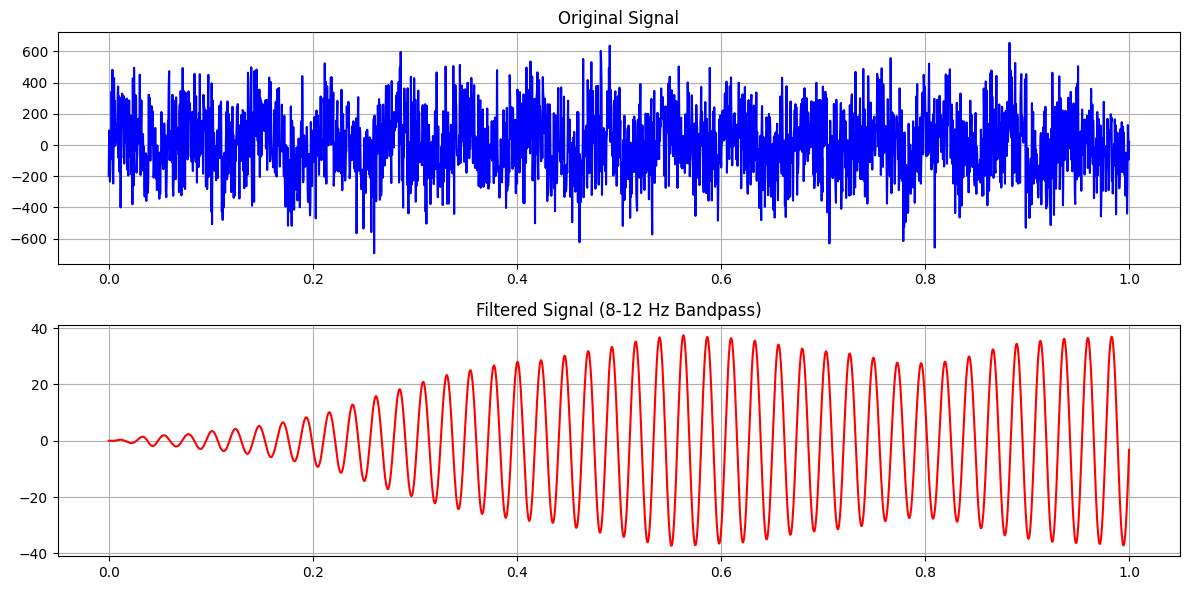

In [27]:
# bandpass between 8 to 12 Hz
from scipy.signal import butter, lfilter

lowcut = 42
highcut = 44

b, a = butter(2, [lowcut, highcut], fs=fs, btype='band')
filtered_signal = lfilter(b, a, sinyal_gabung)

# compare filtered signal with original in subplots
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_axis, sinyal_gabung, 'b-')
plt.title('Original Signal')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(time_axis, filtered_signal, 'r-')
plt.title('Filtered Signal (8-12 Hz Bandpass)')
plt.grid(True)
plt.tight_layout()
plt.show()